<a href="https://colab.research.google.com/github/BlazingStormer/Captcha-recognition-using-CNN/blob/main/Captcha_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [44]:
#importing libraries
import numpy as np

%matplotlib inline
#to use as command line calls #using inline graphs will come next to code

import matplotlib.pyplot as plt #for graphs
import os #for operating system dependent fucntionality
from keras import layers #for building layers of neural net
from keras.models import Model
from keras.models import load_model
from keras import callbacks #for training logs, saving to disk periodically
import cv2 #OpenCV(Open Source computer vision lib), containg CV algos
import string

In [45]:
#print images in dataset
os.listdir("/content/drive/My Drive/captcha_dataset (2)/samples")

['7y2x4.png',
 '8gmc4.png',
 '8db67.png',
 '8n34n.png',
 '8n4n8.png',
 '8n65n.png',
 '8np22.png',
 '8nbew.png',
 '8wy7d.png',
 '8y63f.png',
 '8ypdn.png',
 '8xef7.png',
 '25egp.png',
 '23mdg.png',
 '32cnn.png',
 '25m6p.png',
 '37d52.png',
 '34b84.png',
 '36nx4.png',
 '42xpy.png',
 '47m2b.png',
 '42dw4.png',
 '53mn8.png',
 '56c34.png',
 '55y2m.png',
 '65ebm.png',
 '64m82.png',
 '62nb3.png',
 '243mm.png',
 '85dxn.png',
 '75pfw.png',
 '244e2.png',
 '268g2.png',
 '245y5.png',
 '474ff.png',
 '428b6.png',
 '865wm.png',
 '832f3.png',
 '658xe.png',
 '7634y.png',
 '52447.png',
 '4433m.png',
 'b28g8.png',
 'b5fm7.png',
 'b55d6.png',
 '76353.png',
 'bdg84.png',
 'b685n.png',
 'bmxpe.png',
 'bw44w.png',
 'bnc2f.png',
 'bn5mw.png',
 'c2yn8.png',
 'c4bny.png',
 'byc82.png',
 'c4mcm.png',
 'c8n8c.png',
 'c7nn8.png',
 'c7gb3.png',
 'c55c6.png',
 'c4527.png',
 'cdfen.png',
 'cd4eg.png',
 'cb8cf.png',
 'cfw6e.png',
 'cnex4.png',
 'cfp86.png',
 'd7en3.png',
 'cnwyc.png',
 'd3c8y.png',
 'd22y5.png',
 'd66c

In [46]:
#total no of images in dataset
n=len(os.listdir("/content/drive/My Drive/captcha_dataset (2)/samples"))
n

1070

In [47]:
#defining size of image
imgshape=(50,200,1) #50-height, 200-width, 1-no of channels


In [48]:
character= string.ascii_lowercase + "0123456789" # All symbols captcha can contain
nchar = len(character) #total number of char possible
nchar

36

In [49]:
#preprocesss image
def preprocess():
  X = np.zeros((n,50,200,1)) #1070*50*200 array with all entries 0
  y = np.zeros((5,n,nchar)) #5*1070*36(5 letters in captcha) with all entries 0

  for i, pic in enumerate(os.listdir("/content/drive/My Drive/captcha_dataset (2)/samples")):
  #i represents index no. of image in directory
  #pic contains the file name of the particular image to be preprocessed at a time

    img = cv2.imread(os.path.join("/content/drive/My Drive/captcha_dataset (2)/samples", pic), cv2.IMREAD_GRAYSCALE) #Read image in grayscale format
    pic_target = pic[:-4]#this drops the .png extension from file name and contains only the captcha for training

    if len(pic_target) < 6: #captcha is not more than 5 letters
      img = img / 255.0 #scales the image between 0 and 1
      img = np.reshape(img, (50, 200, 1)) #reshapes image to width 200 , height 50 ,channel 1

      target=np.zeros((5,nchar)) #creates an array of size 5*36 with all entries 0

      for j, k in enumerate(pic_target):
      #j iterates from 0 to 4(5 letters in captcha)
      #k denotes the letter in captcha which is to be scanned
         index = character.find(k) #index stores the position of letter k of captcha in the character string
         target[j, index] = 1 #replaces 0 with 1 in the target array at the position of the letter in captcha

      X[i] = img #stores all the images
      y[:,i] = target #stores all the info about the letters in captcha of all images

  return X,y

In [50]:
#create model
def createmodel():
    img = layers.Input(shape=imgshape) # Get image as an input of size 50,200,1
    conv1 = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(img) #50*200
    mp1 = layers.MaxPooling2D(padding='same')(conv1)  # 25*100
    conv2 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp1)
    mp2 = layers.MaxPooling2D(padding='same')(conv2)  # 13*50
    conv3 = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(mp2)
    bn = layers.BatchNormalization()(conv3) #to improve the stability of model
    mp3 = layers.MaxPooling2D(padding='same')(bn)  # 7*25

    flat = layers.Flatten()(mp3) #convert the layer into 1-D

    outs = []
    for _ in range(5): #for 5 letters of captcha
        dens1 = layers.Dense(64, activation='relu')(flat)
        drop = layers.Dropout(0.5)(dens1) #drops 0.5 fraction of nodes
        res = layers.Dense(nchar, activation='sigmoid')(drop)

        outs.append(res) #result of layers

    # Compile model and return it
    model = Model(img, outs) #create model
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
    return model

In [51]:
#Create model
model=createmodel();
model.summary();

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 50, 200, 1)]         0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 50, 200, 16)          160       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 25, 100, 16)          0         ['conv2d_6[0][0]']            
 g2D)                                                                                             
                                                                                                  
 conv2d_7 (Conv2D)           (None, 25, 100, 32)          4640      ['max_pooling2d_6[0][0]'

In [52]:
X,y=preprocess()

In [53]:
#split the 1070 samples where 970 samples will be used for training purpose
X_train, y_train = X[:970], y[:, :970]
X_test, y_test = X[970:], y[:, 970:]

In [54]:
#Applying the model
hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], batch_size=32, epochs=60, validation_split=0.2)
#batch size- 32 defines no. of samples per gradient update
#Validation split=0.2 splits the training set in 80-20% for training nd testing

Epoch 1/60
25/25 [==============================] - 5s 38ms/step - loss: 17.9946 - dense_21_loss: 3.5961 - dense_23_loss: 3.6819 - dense_25_loss: 3.5663 - dense_27_loss: 3.5569 - dense_29_loss: 3.5935 - dense_21_accuracy: 0.0554 - dense_23_accuracy: 0.0361 - dense_25_accuracy: 0.0425 - dense_27_accuracy: 0.0374 - dense_29_accuracy: 0.0425 - val_loss: 17.7317 - val_dense_21_loss: 3.5468 - val_dense_23_loss: 3.5654 - val_dense_25_loss: 3.5491 - val_dense_27_loss: 3.5316 - val_dense_29_loss: 3.5389 - val_dense_21_accuracy: 0.0515 - val_dense_23_accuracy: 0.0412 - val_dense_25_accuracy: 0.0464 - val_dense_27_accuracy: 0.1082 - val_dense_29_accuracy: 0.0773
Epoch 2/60
25/25 [==============================] - 0s 16ms/step - loss: 16.8476 - dense_21_loss: 3.2765 - dense_23_loss: 3.5518 - dense_25_loss: 3.3227 - dense_27_loss: 3.3035 - dense_29_loss: 3.3931 - dense_21_accuracy: 0.0902 - dense_23_accuracy: 0.0954 - dense_25_accuracy: 0.0554 - dense_27_accuracy: 0.0928 - dense_29_accuracy: 0.072

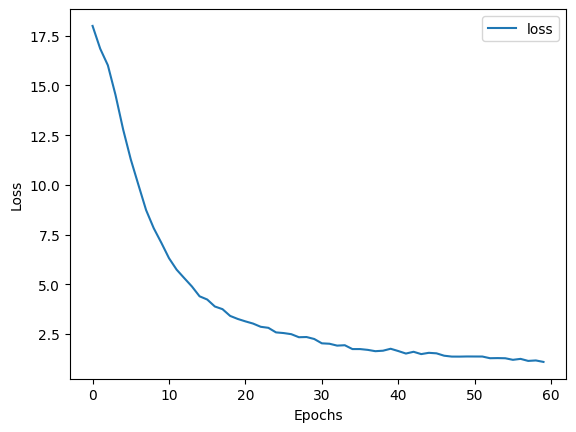

In [55]:
#graph of loss vs epochs
for label in ["loss"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

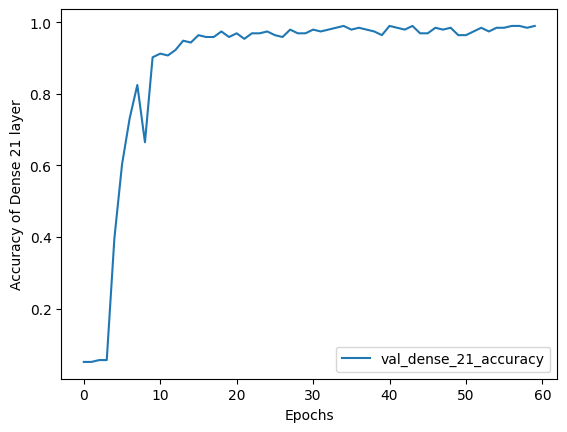

In [58]:
#graph of accuracy of dense_21 vs epochs
for label in ["val_dense_21_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 21 layer")
plt.show()



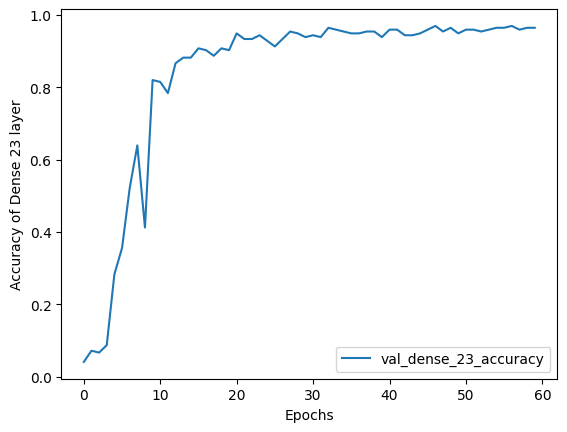

In [59]:
#graph of accuracy of dense_23 vs epochs
for label in ["val_dense_23_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 23 layer")
plt.show()

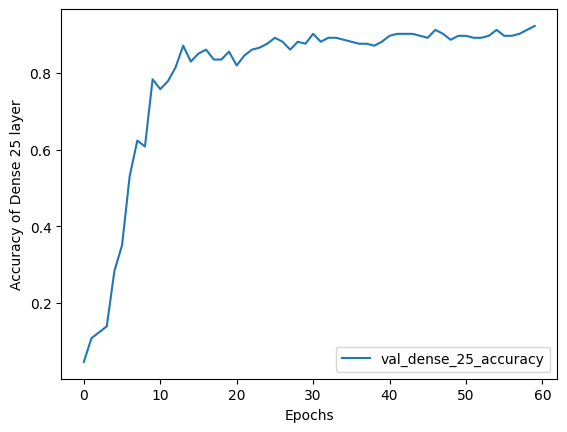

In [60]:
#graph of accuracy of dense_25 vs epochs
for label in ["val_dense_25_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 25 layer")
plt.show()

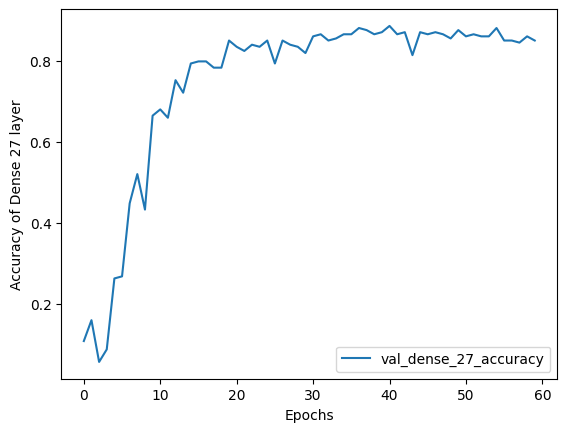

In [61]:
#graph of accuracy of dense_27 vs epochs
for label in ["val_dense_27_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 27 layer")
plt.show()

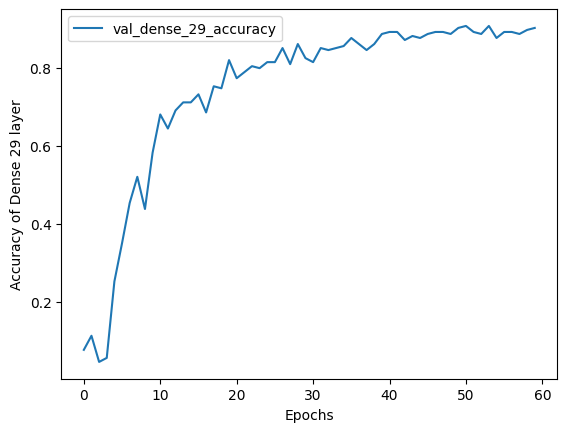

In [62]:
#graph of accuracy of dense_29 vs epochs
for label in ["val_dense_29_accuracy"]:
  plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Dense 29 layer")
plt.show()

In [63]:
#Loss on training set
#Finding Loss on training set
preds = model.evaluate(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]])
print ("Loss on training set= " + str(preds[0]))

31/31 [==============================] - 0s 9ms/step - loss: 0.3238 - dense_21_loss: 0.0057 - dense_23_loss: 0.0307 - dense_25_loss: 0.0753 - dense_27_loss: 0.1380 - dense_29_loss: 0.0741 - dense_21_accuracy: 0.9969 - dense_23_accuracy: 0.9918 - dense_25_accuracy: 0.9835 - dense_27_accuracy: 0.9691 - dense_29_accuracy: 0.9794
Loss on training set= 0.3238067328929901


In [64]:
#Finding loss on test set
preds = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print ("Loss on testing set= " + str(preds[0]))

4/4 [==============================] - 0s 9ms/step - loss: 2.2741 - dense_21_loss: 0.0023 - dense_23_loss: 0.4929 - dense_25_loss: 0.3049 - dense_27_loss: 1.0988 - dense_29_loss: 0.3752 - dense_21_accuracy: 1.0000 - dense_23_accuracy: 0.9300 - dense_25_accuracy: 0.9000 - dense_27_accuracy: 0.7600 - dense_29_accuracy: 0.9100
Loss on testing set= 2.2741057872772217


In [65]:
#to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

    if img is not None: #image foud at file path
        img = img / 255.0 #Scale image
    else:
        print("Not detected");

    res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis])) #np.newaxis=1
    #added this bcoz x_train 970*50*200*1
    #returns array of size 1*5*36
    result = np.reshape(res, (5, 36)) #reshape the array
    k_ind = []
    probs = []
    for i in result:
        k_ind.append(np.argmax(i)) #adds the index of the char found in captcha

    capt = '' #string to store predicted captcha
    for k in k_ind:
        capt += character[k] #finds the char corresponding to the index
    return capt

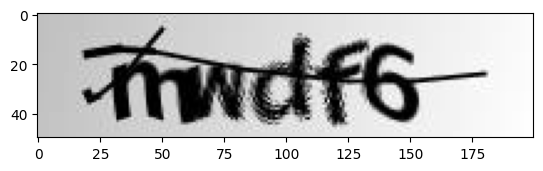

In [73]:
#Check model on samples
img=cv2.imread('/content/drive/MyDrive/captcha_dataset (2)/samples/mwdf6.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [75]:
print("Predicted Captcha =",predict('/content/drive/MyDrive/captcha_dataset (2)/samples/mwdf6.png'))

1/1 [==============================] - 1s 1s/step
Predicted Captcha = mwdf6


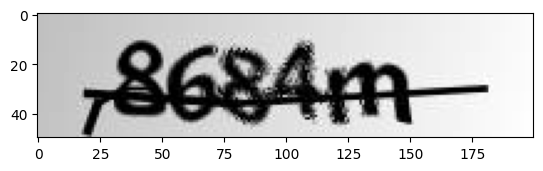

In [76]:
#Sample 2
img=cv2.imread('/content/drive/MyDrive/captcha_dataset (2)/samples/8684m.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [77]:
print("Predicted Captcha =",predict('/content/drive/MyDrive/captcha_dataset (2)/samples/8684m.png'))

1/1 [==============================] - 0s 44ms/step
Predicted Captcha = 8684m
